In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import networkx as nx
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statistics

In [ ]:
Graphtype = nx.Graph()
filepath = '/content/drive/MyDrive/GNN_datasets/amazon0601.txt'
G = nx.read_edgelist(
    filepath,
    comments='#',

    create_using=Graphtype,
    nodetype=int
)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/GNN_datasets/finalpreprocesseddata.csv')

In [ ]:
df.head()

,ID,ASIN,title,group,salesrank,num_categories,totalreviews,downloadedreviews,avg_rating
0,1,0827229534,Patterns of Preaching,Book,396585,2,2,2,5.0
1,2,0738700797,Candlemas,Book,168596,2,12,12,4.5
2,3,0486287785,World War II Allied Fighter Planes Trading Cards,Book,1270652,1,1,1,5.0
3,4,0842328327,Life Application Bible Commentary,Book,631289,5,1,1,4.0
4,5,1577943082,Prayers That Avail Much for Business,Book,455160,2,0,0,0.0


In [ ]:
df = df.set_index('ID')

In [ ]:
df.head()

,ID,ASIN,title,group,salesrank,num_categories,totalreviews,downloadedreviews,avg_rating
0,1,0827229534,Patterns of Preaching,Book,396585,2,2,2,5.0
1,2,0738700797,Candlemas,Book,168596,2,12,12,4.5
2,3,0486287785,World War II Allied Fighter Planes Trading Cards,Book,1270652,1,1,1,5.0
3,4,0842328327,Life Application Bible Commentary,Book,631289,5,1,1,4.0
4,5,1577943082,Prayers That Avail Much for Business,Book,455160,2,0,0,0.0


In [ ]:
df.describe()

,ID,salesrank,num_categories,totalreviews,downloadedreviews,avg_rating
count,542684.000000,5.426840e+05,542684.000000,542684.000000,542684.000000,542684.000000
mean,274414.212208,4.893243e+05,4.624605,14.339818,13.992017,3.209534
std,158454.479276,5.677230e+05,4.450647,74.768369,71.908413,1.996296
min,1.000000,-1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,137161.750000,9.074100e+04,2.000000,0.000000,0.000000,0.000000
50%,274427.500000,3.004900e+05,4.000000,2.000000,2.000000,4.000000
75%,411674.250000,6.720688e+05,6.000000,8.000000,7.000000,5.000000
max,548551.000000,3.798351e+06,116.000000,5545.000000,4995.000000,5.000000


In [ ]:
df_nosalesrank = df[df.salesrank < 1]

In [ ]:
df = df[df.salesrank > 0]

In [ ]:
df.describe()

,ID,salesrank,num_categories,totalreviews,downloadedreviews,avg_rating
count,542184.000000,5.421840e+05,542184.000000,542184.000000,542184.000000,542184.000000
mean,274406.345991,4.897755e+05,4.627431,14.352253,14.004242,3.211893
std,158446.258031,5.677901e+05,4.451237,74.801568,71.940295,1.995118
min,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,137167.750000,9.119875e+04,2.000000,0.000000,0.000000,0.000000
50%,274412.500000,3.010080e+05,4.000000,2.000000,2.000000,4.000000
75%,411653.250000,6.725105e+05,6.000000,8.000000,7.000000,5.000000
max,548510.000000,3.798351e+06,116.000000,5545.000000,4995.000000,5.000000


In [ ]:
nodeattrdf = df[['group', 'salesrank', 'totalreviews', 'downloadedreviews', 'avg_rating']].copy()

In [ ]:
nx.set_node_attributes(G, nodeattrdf.to_dict('index'))

In [ ]:
G.nodes[2]

{'avg_rating': 5.0,
 'downloadedreviews': 1,
 'group': 'Book',
 'salesrank': 1270652,
 'totalreviews': 1}

In [ ]:
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

from torch_geometric.utils.convert import to_networkx, from_networkx

1.11.0+cu113


In [ ]:
remove = [nodes for nodes in dict(G.nodes()) if len(G.nodes[nodes]) == 0]

In [ ]:
len(remove)

4932

In [ ]:
G.remove_nodes_from(remove)

In [ ]:
pyg_graph = from_networkx(G)

In [ ]:
print(pyg_graph, flush=True)

Data(edge_index=[2, 4768984], group=[398462], salesrank=[398462], totalreviews=[398462], downloadedreviews=[398462], avg_rating=[398462], num_nodes=398462)


In [ ]:
print("The graph has {} nodes and {} edges".format(G.number_of_nodes(), G.number_of_edges()))

The graph has 398462 nodes and 2384492 edges


In [ ]:
node_degrees = [deg for n, deg in dict(G.degree()).items()]

In [ ]:
print(max(node_degrees), min(node_degrees))

2721 0


In [ ]:
deg0_nodes = [n for n, deg in dict(G.degree()).items() if deg == 0]

In [ ]:
len(deg0_nodes)

137

In [ ]:
G.remove_nodes_from(deg0_nodes)

In [ ]:
node_degrees = [deg for n, deg in dict(G.degree()).items()]

In [ ]:
min(node_degrees)

1

In [ ]:
print("The graph has {} nodes and {} edges".format(G.number_of_nodes(), G.number_of_edges()))

The graph has 398325 nodes and 2384492 edges


Note: Searching for subgraphs within graph for a given salesrank.

In [ ]:
components = [G.subgraph(c).copy() for c in nx.connected_components(G)]

In [ ]:
for idx,g in enumerate(components,start=1):
    print(f"Component {idx}: Nodes: {g.number_of_nodes()} Edges: {g.number_of_edges()}")

Component 1: Nodes: 398237 Edges: 2384290
Component 2: Nodes: 2 Edges: 1
Component 3: Nodes: 2 Edges: 1
Component 4: Nodes: 2 Edges: 1
Component 5: Nodes: 2 Edges: 1
Component 6: Nodes: 2 Edges: 1
Component 7: Nodes: 2 Edges: 1
Component 8: Nodes: 2 Edges: 1
Component 9: Nodes: 3 Edges: 3
Component 10: Nodes: 2 Edges: 1
Component 11: Nodes: 2 Edges: 1
Component 12: Nodes: 3 Edges: 3
Component 13: Nodes: 4 Edges: 6
Component 14: Nodes: 13 Edges: 73
Component 15: Nodes: 3 Edges: 2
Component 16: Nodes: 2 Edges: 1
Component 17: Nodes: 2 Edges: 1
Component 18: Nodes: 2 Edges: 1
Component 19: Nodes: 2 Edges: 1
Component 20: Nodes: 4 Edges: 4
Component 21: Nodes: 2 Edges: 1
Component 22: Nodes: 3 Edges: 2
Component 23: Nodes: 3 Edges: 3
Component 24: Nodes: 15 Edges: 80
Component 25: Nodes: 5 Edges: 10
Component 26: Nodes: 2 Edges: 1
Component 27: Nodes: 2 Edges: 1


In [ ]:
N, K = G.order(), G.size()
avg_deg = K / N

print("Number of nodes: ", N)
print("Number of edges: ", K)
print("Average degree: ", avg_deg)

Number of nodes:  398325
Number of edges:  2384492
Average degree:  5.9862976212891486


In [ ]:
degrees = [deg for n, deg in dict(G.degree()).items()]
degrees_vals = sorted(set(degrees))
hist = [list(degrees).count(v) for v in degrees_vals]

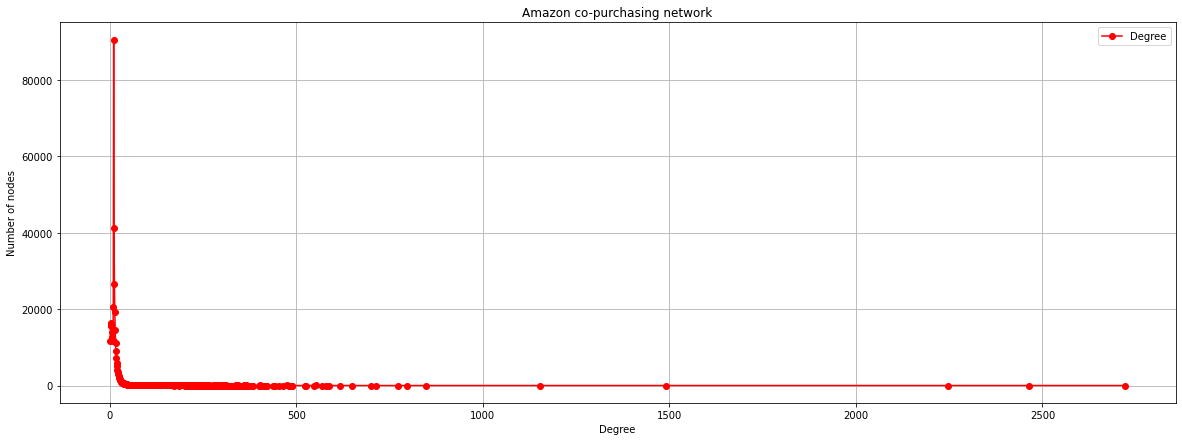

In [ ]:
plt.figure(figsize = (20,7))
plt.grid(True)
plt.plot(degrees_vals, hist, 'ro-')
plt.legend(['Degree'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Amazon co-purchasing network')
#plt.xlim([0, 2*10**2])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  


(0.6733852091442336, 200)

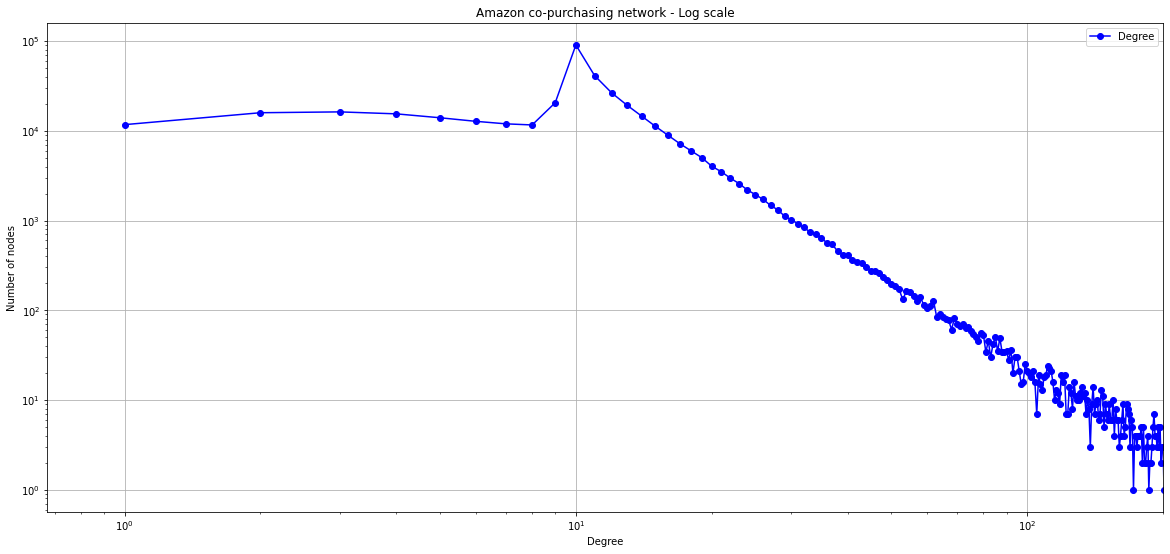

In [ ]:
plt.figure(figsize = (20,9))
plt.grid(True)
plt.loglog(degrees_vals, hist, 'bo-')
plt.legend(['Degree'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Amazon co-purchasing network - Log scale')
plt.xlim([0, 2*10**2])

In [ ]:
nx.average_clustering(G)

0.41726424282745256

In [ ]:
import numpy as np

In [ ]:
self_loop = list(nx.selfloop_edges(G))
print("Number of self loops:", len(self_loop))

Number of self loops: 0


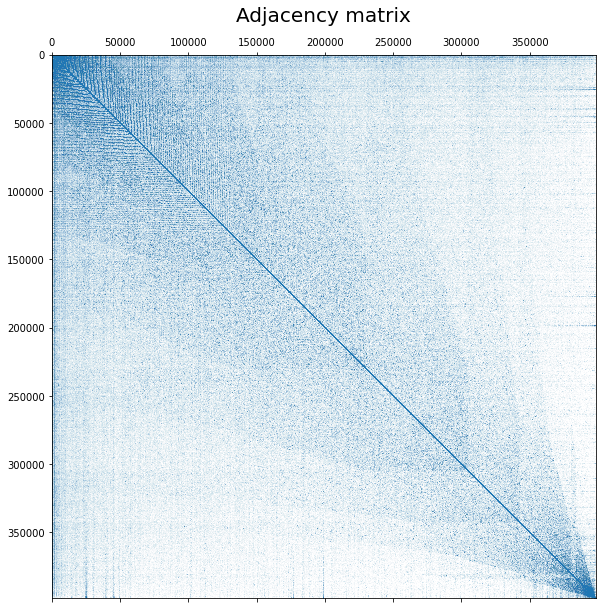

In [ ]:
A = nx.to_scipy_sparse_matrix(G, nodelist=None, dtype=None, weight='weight', format='csr')

fig = plt.figure(figsize=(13,10))
ax = plt.subplot()
ax.spy(A, aspect='equal',marker='.', markersize=0.06, alpha=0.2)
ax.set_title('Adjacency matrix', size=20)

plt.show()

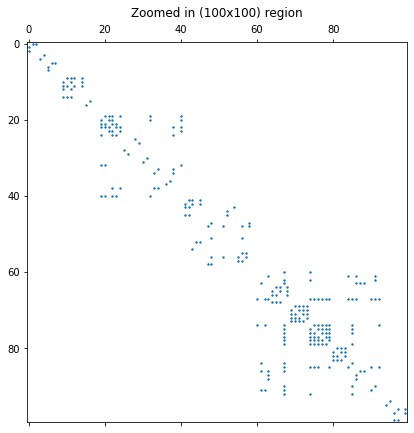

In [ ]:
# Zoomed in (100x100) region of A
fig = plt.figure(figsize=(10,7))
ax = plt.subplot()
ax.spy(A[33494:33594,33494:33594], aspect='equal',marker='.', markersize=2.8, alpha=1)
ax.set_title('Zoomed in (100x100) region', size=12)
plt.show()

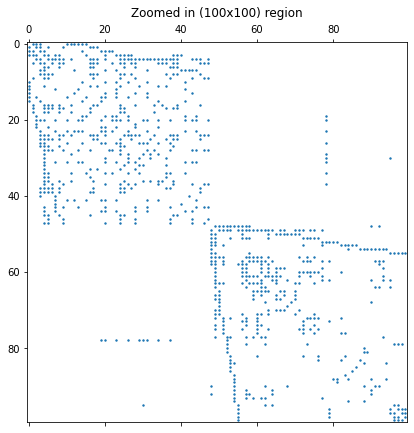

In [ ]:
# Zoomed in (100x100) region of A
fig = plt.figure(figsize=(10,7))
ax = plt.subplot()
ax.spy(A[:100,:100], aspect='equal',marker='.', markersize=2.8, alpha=1)
ax.set_title('Zoomed in (100x100) region', size=12)
plt.show()

In [ ]:
def DiagonalSums(mat, n):
    """
    This function returns the sum of the diagonal element of a matrix.
    Inputs:
    - mat : matrix
    - n : matrix dimension
    Output:
    - diagonal_sum : sum of elements along the principal diagonal of the matrix mat
    """
    diagonal_sum = 0
    for i in range(0, n):
        for j in range(0, n):
            # Condition for principal diagonal
            if (i == j) and (A[i,j]!=0):
              diagonal_sum = diagonal_sum + 1


    return diagonal_sum

In [ ]:
# Check the number of self loops, i.e. the sum of diagonal elements that are equal to 1
print("Number of diagonal elements equal to 1:", DiagonalSums(A, 33593))

Number of diagonal elements equal to 1: 0


## Degree Distribution
### Network Degree

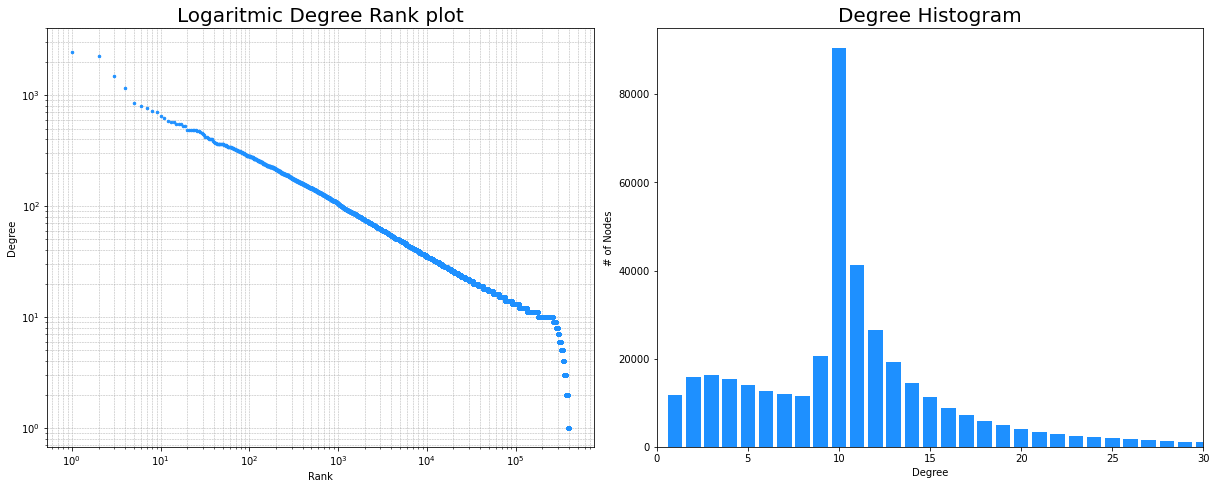

In [ ]:
# get the degrees sorted in descending order
degree_sequence = sorted([d for n, d in G.degree()], reverse=True) # G.degree() returns a DegreeView object capable of iterating (node_ID, degree) pairs

fig = plt.figure("Degree of a graph", figsize=(17, 16))
axgrid = fig.add_gridspec(5, 4) # Create a gridspec for adding subplots of different sizes

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.loglog(degree_sequence, "o", markersize=2.5, color="dodgerblue") # loglog tells matplotlib to use log scales
ax1.grid(which='both', linestyle='--', linewidth=0.5)
ax1.set_title("Logaritmic Degree Rank plot", size = 20)
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True), color="dodgerblue")
ax2.set_title("Degree Histogram", size = 20)
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")
ax2.set_xlim(0,30)

fig.tight_layout()

plt.show()

## Assortativity
**Degree assortativity** of the graph, which is the tendency for nodes of high degree in a graph to be connected to high degree nodes

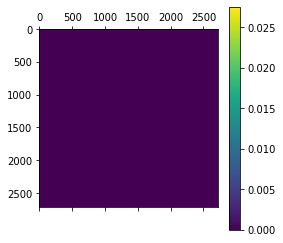

In [ ]:
# degree correlation matrix
mix_mat0 = nx.degree_mixing_matrix(G)
mix_mat0

##########
max_degree = max(deg for n, deg in G.degree)
mapping = {x: x for x in range(max_degree + 1)} # identity mapping
mix_mat = nx.degree_mixing_matrix(G, mapping=mapping)
mix_mat

plt.matshow(mix_mat);
plt.colorbar()
plt.show()

In [ ]:
def degree_assortativity(G, x, y):
  r = nx.degree_assortativity_coefficient(G, x, y)
  return r

In [ ]:
r_in_in = degree_assortativity(G, 'in', 'in')
print('r(in-in):',round(r_in_in,2))

r_in_out = degree_assortativity(G, 'in', 'out')
print('r(in-out):',round(r_in_out,2))

r_out_in = degree_assortativity(G, 'out', 'in')
print('r(out-in):',round(r_out_in,2))

r_out_out = degree_assortativity(G, 'out', 'out')
print('r(out-out):',round(r_out_out,2))

r(in-in): -0.02
r(in-out): -0.02
r(out-in): -0.02
r(out-out): -0.02


**nearest neighbour degree** is the simplest form of assortativity: the correlation between the degree of a node and the average degree of its neighbors.

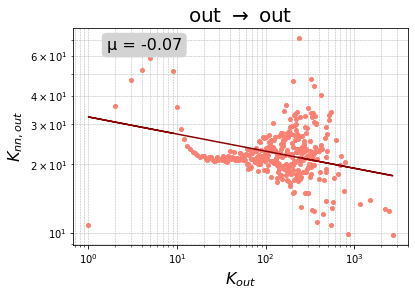

In [ ]:
degree, average_neighbour_deg = zip(*nx.average_degree_connectivity(G, 'out', 'out').items())

plt.loglog(degree, average_neighbour_deg, 'o', color='salmon', markersize = 4)

degree = [i for i in degree if i != 0] # removes degrees equal to zero
average_neighbour_deg = [i for i in average_neighbour_deg if i != 0]
m_out_out, q = np.polyfit(np.log(degree),np.log(average_neighbour_deg),1) # slope and intercept of the fitting line
yfit = np.exp(m_out_out*np.log(degree)+q)
plt.loglog(degree, yfit, color='darkred')

plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.title("out $\\rightarrow$ out", size = 20) #(\u03BC = "+str(round(m_out_out,2))+")"
plt.xlabel("$K_{out}$", size = 16)
plt.ylabel("$K_{nn,out}$", size = 16)
plt.annotate("\u03BC = "+str(round(m_out_out,2)), xy=(0.1,0.9), xycoords='axes fraction',
             fontsize=16, bbox=dict(boxstyle="round", fc="lightgrey", ec="none"))

plt.show()

## Authorities and Hubs

In [ ]:
hubs, authorities = nx.hits(G, max_iter=50, normalized=True)

### 10 biggest Hubs

In [ ]:
hubs = dict(sorted(hubs.items(), key=lambda item: item[1], reverse=True))
#list(hubs.items())[0:10]

df['hubs'] = df['ID'].map(hubs)
hubs = df[['title','group','salesrank','hubs']].sort_values('hubs',ascending=False).reset_index(drop=True)
hubs.head(10)

,title,group,salesrank,hubs
0,Successes in Anti-Poverty,Book,2312612,0.006149
1,Beginning ASP.NET Databases using C#,Book,48408,0.005080
2,Still Life,Music,110723,0.002695
3,An Outline of Philosophy,Book,581223,0.001189
4,German Medieval Armies 1000-1300 (Men-at-Arms ...,Book,449604,0.001064
5,The Shurley Method,Book,571164,0.001034
6,Naked Science,Book,619257,0.000750
7,Secrets of Gypsy Love Magick (Llewellyn's New ...,Book,409481,0.000585
8,A Green History of the World,Book,83357,0.000578
9,American Patriot,Music,3430,0.000423


### Top 10 authorities

In [ ]:
authorities = dict(sorted(authorities.items(), key=lambda item: item[1], reverse=True))
list(authorities.items())[0:10]

df['authorities'] = df['ID'].map(authorities)
auth = df[['title','group','salesrank','authorities']].sort_values('authorities',ascending=False).reset_index(drop=True)
auth.head(10)

,title,group,salesrank,authorities
0,Successes in Anti-Poverty,Book,2312612,0.006149
1,Beginning ASP.NET Databases using C#,Book,48408,0.005080
2,Still Life,Music,110723,0.002695
3,An Outline of Philosophy,Book,581223,0.001189
4,German Medieval Armies 1000-1300 (Men-at-Arms ...,Book,449604,0.001064
5,The Shurley Method,Book,571164,0.001034
6,Naked Science,Book,619257,0.000750
7,Secrets of Gypsy Love Magick (Llewellyn's New ...,Book,409481,0.000585
8,A Green History of the World,Book,83357,0.000578
9,American Patriot,Music,3430,0.000423


### Which Authorities are also Hubs?

In [ ]:
equal = []
for i in range(100):
  for j in range(100):
    if auth.iloc[i,[0,1]].tolist() == hubs.iloc[j,[0,1]].tolist():
      equal.append(i)

In [ ]:
auth.iloc[equal,[0,-1]].reset_index(drop=True)

,title,authorities
0,Successes in Anti-Poverty,0.006149
1,Beginning ASP.NET Databases using C#,0.005080
2,Still Life,0.002695
3,An Outline of Philosophy,0.001189
4,German Medieval Armies 1000-1300 (Men-at-Arms ...,0.001064
...,...,...
95,The Age of Revolution,0.000218
96,"Michelin South East/Midlands/East Anglia, Grea...",0.000218
97,Something from the Nightside,0.000218
98,On Wittgenstein,0.000218


### Rank Vs Authorites

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


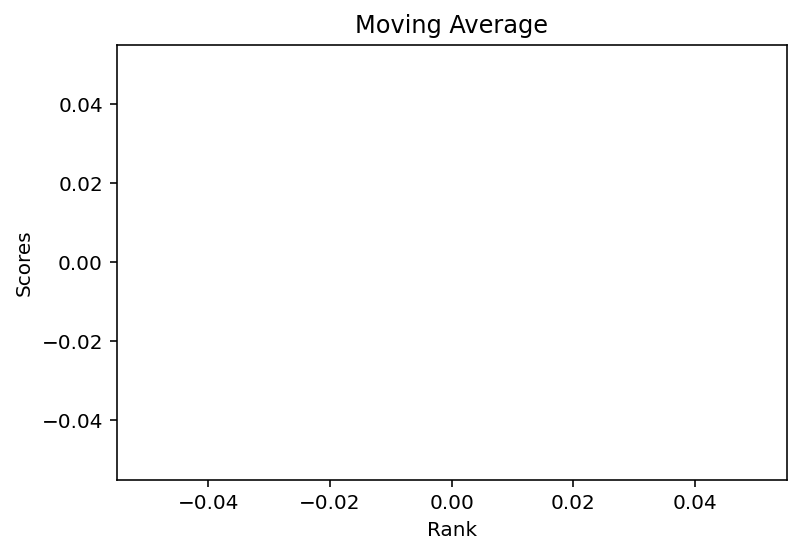

In [ ]:
%config InlineBackend.figure_format='retina'
from scipy import interpolate
from scipy.interpolate import splev, splrep,UnivariateSpline
prova = df[['salesrank','hubs','authorities']]
prova['salesrank'] = pd.to_numeric(prova['salesrank'])
prova = prova.sort_values('salesrank',ascending=True,na_position='last')

n = 30000
x = prova['salesrank'][0:n]
y1 = prova['hubs'][0:n].rolling(window=100).mean()
y2 = prova['authorities'][0:n].rolling(window=100).mean()

plt.plot(x, y1)
plt.plot(x, y2)
plt.ylabel('Scores')
plt.xlabel('Rank')
plt.title('Moving Average')
plt.show()

In [ ]:
prova.head()

,salesrank,hubs,authorities
294109,1,1.408715e-07,1.408715e-07
28013,2,1.148535e-06,1.148535e-06
112270,6,3.063067e-07,3.063067e-07
330960,7,5.376057e-08,5.376057e-08
481199,8,NaN,NaN


## Centrality measures and filtered network study
###Creating the filtered network

In [ ]:
pagerank= nx.pagerank(G)

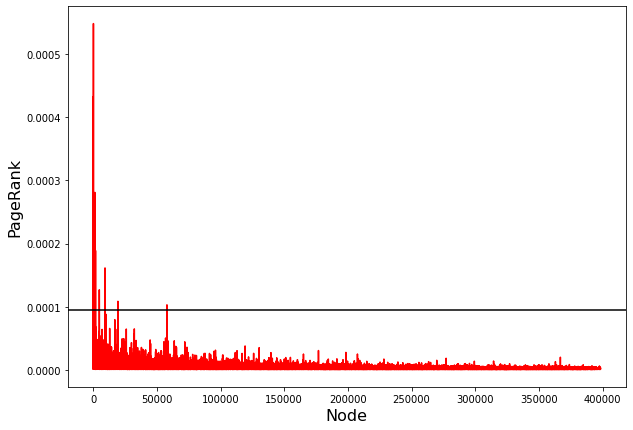

In [ ]:
plt.figure(figsize=(10, 7))

xx = range(0,len(pagerank.values()))
yy= list(pagerank.values())
plt.plot(xx,yy, color='r')
plt.xlabel("Node", size = 16)
plt.ylabel("PageRank", size = 16)
plt.axhline(y=9.43e-5, color='black', linestyle='-')
plt.show()

In [ ]:
def remove_alsobuy_not_present (df, verbose=False):

    def computation(df,):
        list_ID = np.unique(df.ID.values)
        temp_df = df[["ID",'also_buy']].explode("also_buy") #create a sort of nodelist for the calculation below
        temp_df = temp_df[ temp_df["also_buy"].isin(list_ID) ] #drop each row that have also_buy entry not containend in the Nodes list
        temp_df = temp_df.groupby(["ID"]).agg(also_buy=("also_buy",list)) #recreate the dataframe with "aggregate" method
        out_df= df[df.ID.isin(temp_df.index)] #keep only the remaining index (ID)

        out_df=out_df.drop("also_buy",axis=1) #remove the old column
        out_df["also_buy"] = temp_df.also_buy.values # add the new filtered column
        out_df=out_df[list(df.columns)].reset_index(drop=True) # rearrange the order to have the same as beforef
        return(out_df)

    init_len=0
    c=1
    while init_len != len(df):
        if verbose:
            print(f"Computing... ({c}-times)  (#rows = {len(df)})\n")
        c+=1
        init_len=len(df)
        df= computation(df)
    if verbose:
        print("\nDONE.")
    return(df)

In [ ]:
#Filtering
threshold= 9.43e-6
id_mod = df.copy()
id_mod["pagerank"] = id_mod.ID.map(nx.pagerank(G))
id_flt = id_mod[id_mod.pagerank > threshold]
# id_flt = remove_alsobuy_not_present(id_flt, verbose=False)

In [ ]:
Gr= G.subgraph(id_flt.ID.values)
print("\nGraph original:", nx.info(Gr))


Graph original: Graph with 3305 nodes and 8235 edges


## Centrality Measures

In [ ]:
degree = nx.degree_centrality(Gr)
pagerank= nx.pagerank(Gr, alpha=0.85)
closeness = nx.closeness_centrality(Gr)
betweenness = nx.betweenness_centrality(Gr)
eigenvector = nx.eigenvector_centrality(Gr, max_iter=600)
harmonic = nx.harmonic_centrality(Gr)

In [ ]:
pos = nx.spring_layout(Gr)

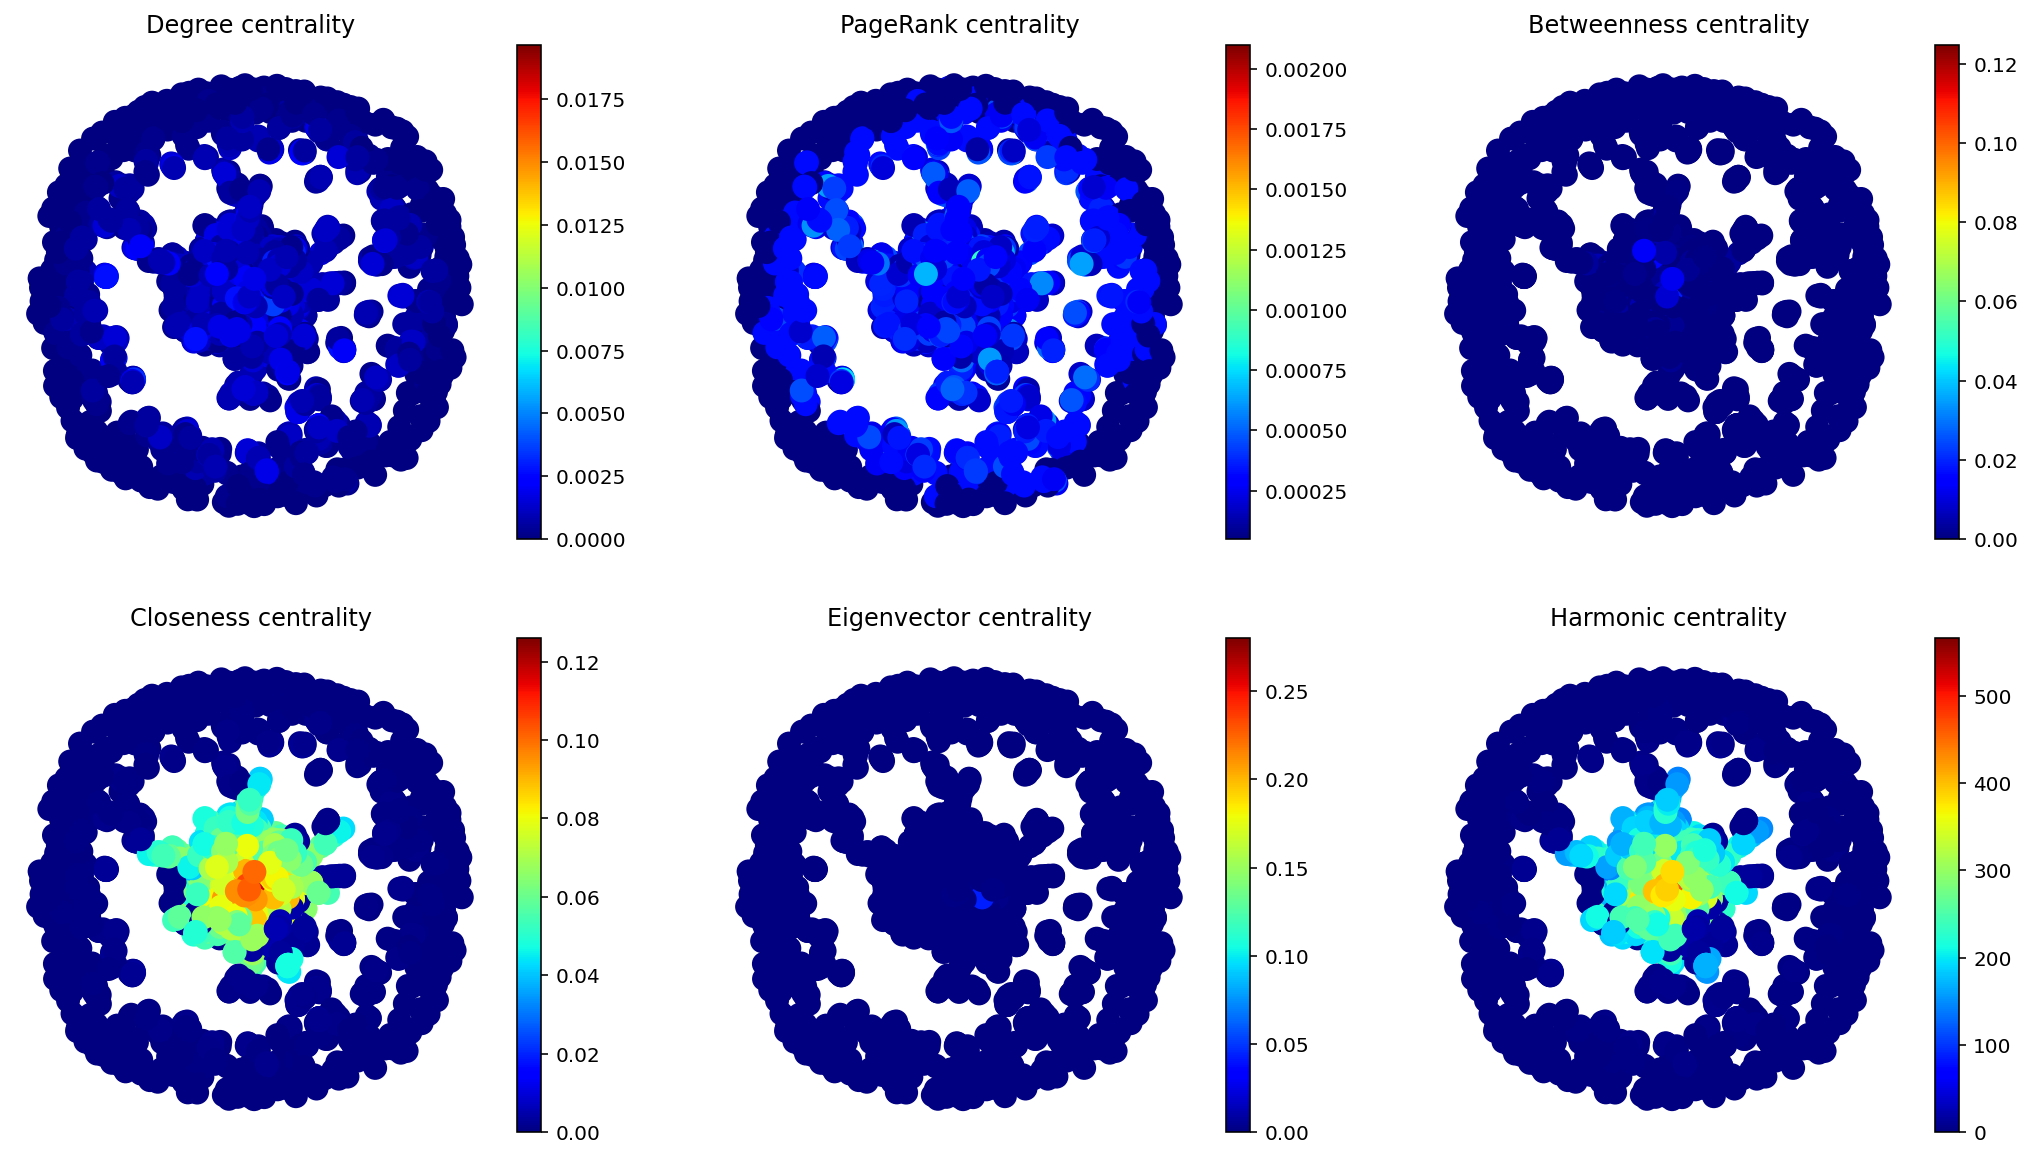

In [ ]:
import matplotlib.colors as colors

def draw(G, pos, measures, measure_name):

    nodes = nx.draw_networkx_nodes(G, pos, node_size=120, cmap=plt.cm.jet,
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    edges = nx.draw_networkx_edges(G, pos, edge_color="grey")

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')

plt.figure(figsize=(18, 10))
plt.subplot(231)
draw(Gr, pos, degree, 'Degree centrality')

plt.subplot(232)
draw(Gr, pos, pagerank, 'PageRank centrality')

plt.subplot(233)
draw(Gr, pos, betweenness, 'Betweenness centrality')

plt.subplot(234)
draw(Gr, pos, closeness, 'Closeness centrality')

plt.subplot(235)
draw(Gr, pos, eigenvector, 'Eigenvector centrality')

plt.subplot(236)
draw(Gr, pos, harmonic, 'Harmonic centrality')

plt.show()